In [222]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("himanshupoddar/zomato-bangalore-restaurants")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/zomato-bangalore-restaurants


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as w
w.filterwarnings("ignore")

In [224]:
import os

print(os.listdir(path))


['zomato.csv']


In [225]:
df = pd.read_csv(path + "/zomato.csv")

In [226]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [228]:
df.shape

(51717, 17)

In [229]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [230]:
df['phone'].fillna('Not Available', inplace=True)

In [231]:
df['location'].fillna('unknown', inplace=True)

In [232]:
df['rate'].fillna(0, inplace=True)

In [233]:
df['rest_type'].fillna('Not Specified', inplace=True)

In [234]:
df['dish_liked'].fillna("Not Specified" , inplace=True)

In [235]:
df['cuisines'].fillna("Not Specified", inplace=True)

In [236]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)


In [237]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
phone,0
location,0
rest_type,0


In [238]:
df.duplicated().value_counts()

,count
False,51717


In [239]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [240]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)' : 'city'},inplace=True)

In [241]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [242]:
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], None)
df['rate'] = df['rate'].astype(float)

df['cost'] = df['cost'].apply(lambda x: str(x).replace(',', ''))
df['cost'] = df['cost'].astype(float)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          49440 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         51717 non-null  object 
 8   location      51717 non-null  object 
 9   rest_type     51717 non-null  object 
 10  dish_liked    51717 non-null  object 
 11  cuisines      51717 non-null  object 
 12  cost          51717 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  type          51717 non-null  object 
 16  city          51717 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB


In [244]:
df['cost']

,cost
0,800.0
1,800.0
2,800.0
3,300.0
4,600.0
...,...
51712,1500.0
51713,600.0
51714,2000.0
51715,2500.0


In [245]:
df.drop_duplicates(inplace=True)

In [246]:
df.duplicated().sum()

np.int64(0)

In [247]:
df['rate'].value_counts()

,count
rate,
0.0,7775
3.9,3972
3.8,3873
3.7,3821
3.6,3316
4.0,3183
4.1,2948
3.5,2784
3.4,2476


<Axes: xlabel='rate', ylabel='Count'>

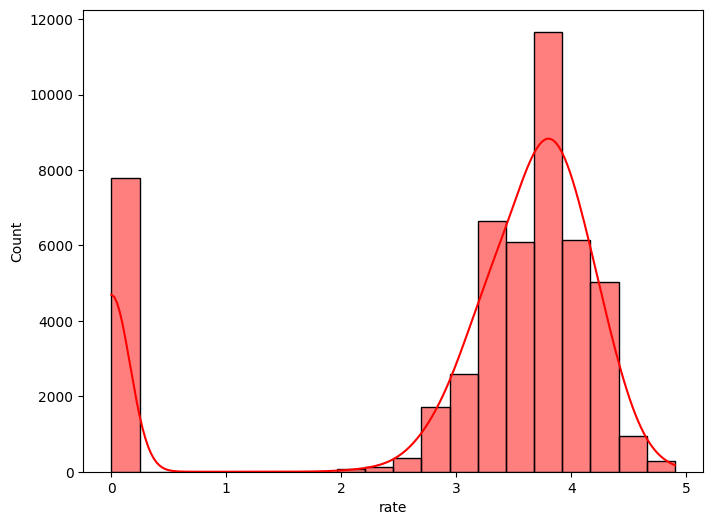

In [248]:
figure=plt.figure(figsize=(8,6))
sns.histplot(df['rate'],bins=20,kde=True,color='red')

In [249]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

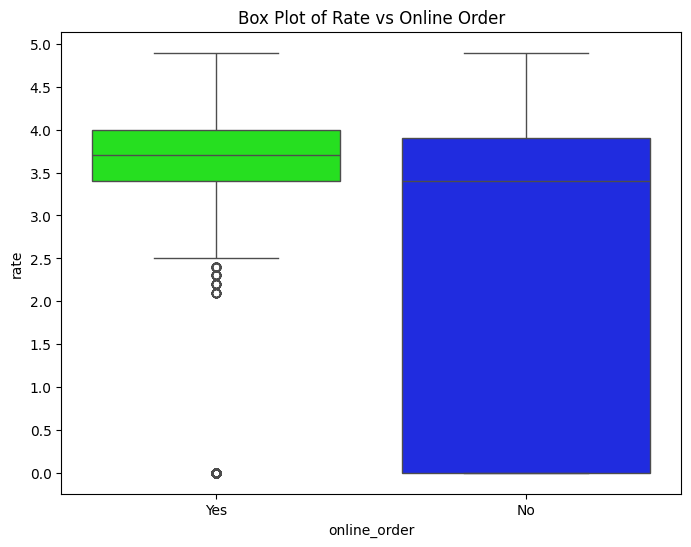

In [250]:
figure=plt.figure(figsize=(8,6))
sns.boxplot(y=df['rate'],x=df['online_order'],data=df,palette='hsv')
plt.yticks([0,0.5,1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('Box Plot of Rate vs Online Order')
plt.show()

In [251]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

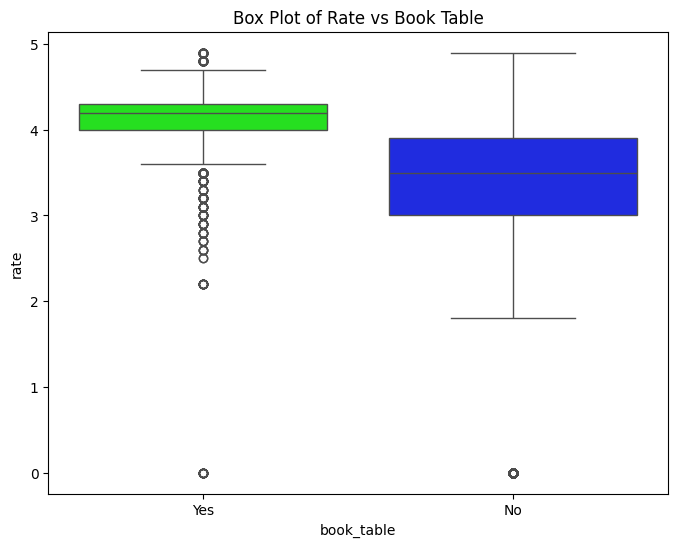

In [252]:
figure=plt.figure(figsize=(8,6))
sns.boxplot(x=df['book_table'],y=df['rate'],data=df,palette='hsv')
plt.title('Box Plot of Rate vs Book Table')
plt.show()

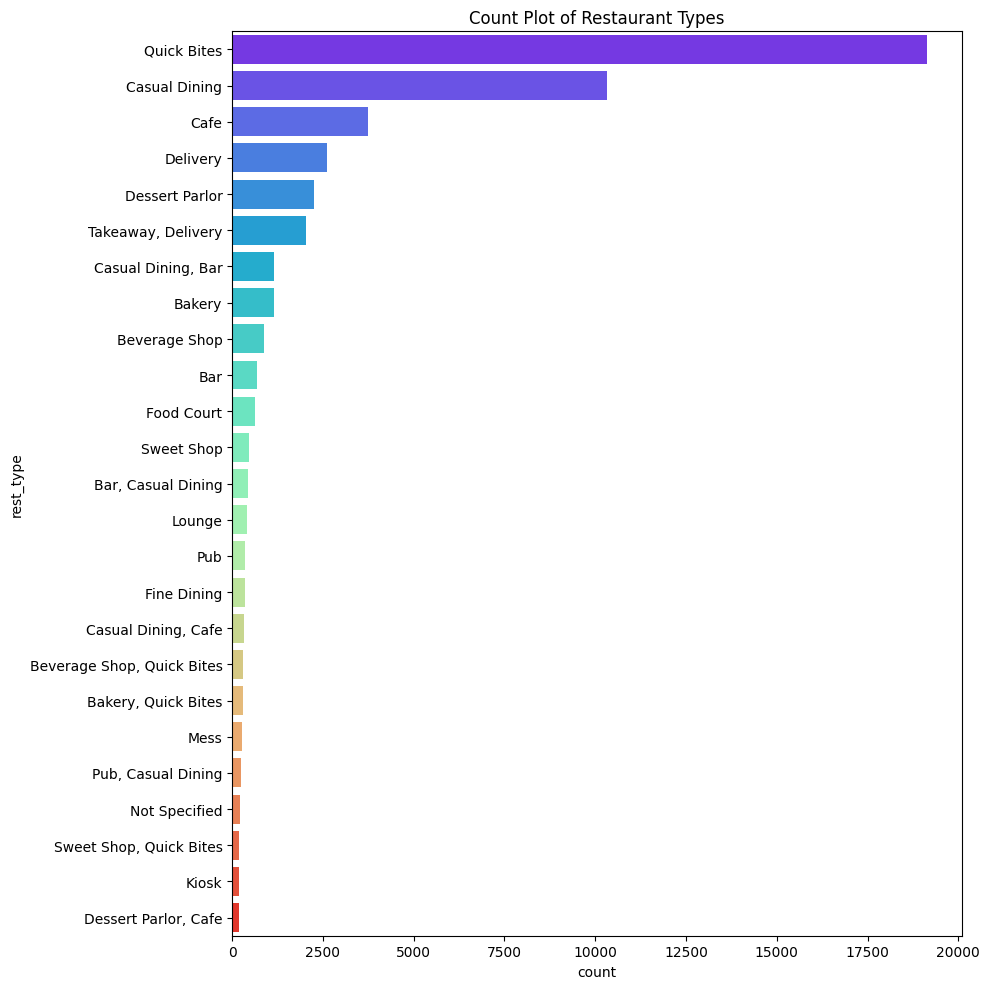

In [253]:
top25 = df['rest_type'].value_counts().nlargest(25).index

# Filter dataframe
df_top = df[df['rest_type'].isin(top25)]

# Plot
plt.figure(figsize=(10,10))
sns.countplot(y='rest_type', data=df_top, order=top25, palette='rainbow')
plt.title('Count Plot of Restaurant Types')
plt.tight_layout()
plt.show()


In [254]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

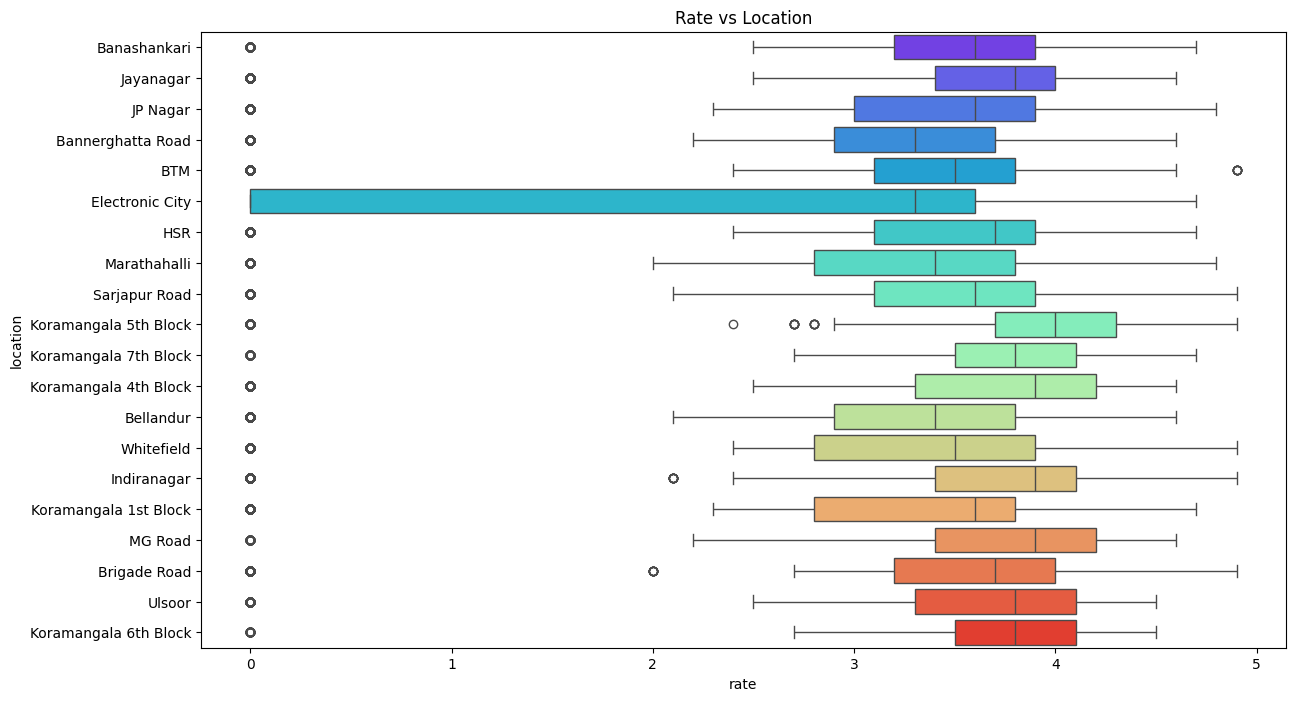

In [255]:
figure=plt.figure(figsize=(14,8))
toploc=df['location'].value_counts().nlargest(20).index
sns.boxplot(data=df[df['location'].isin(toploc)],x='rate',y='location',palette='rainbow')
plt.title('Rate vs Location')
plt.xlabel('rate')
plt.ylabel('location')
plt.show()


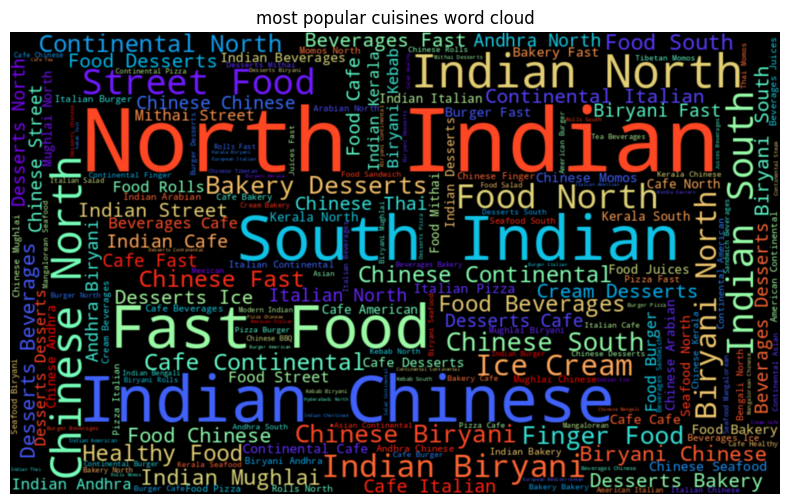

In [256]:
from wordcloud import WordCloud
text= ' '.join(df['cuisines'].dropna().values)
wordcloud=WordCloud(width=1000,height=600,background_color='black',colormap='rainbow').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.title('most popular cuisines word cloud')
plt.show()

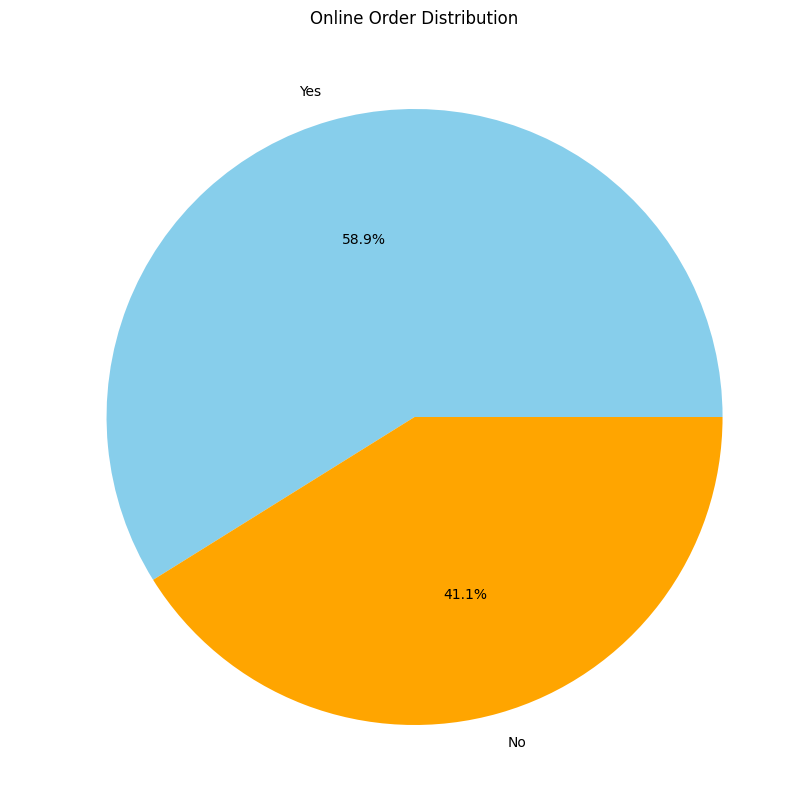

In [257]:
figure=plt.figure(figsize=(10,10))
df['online_order'].value_counts().plot.pie(autopct='%1.1f%%',colors=['skyblue','orange'])
plt.title('Online Order Distribution')
plt.ylabel(' ')
plt.show()

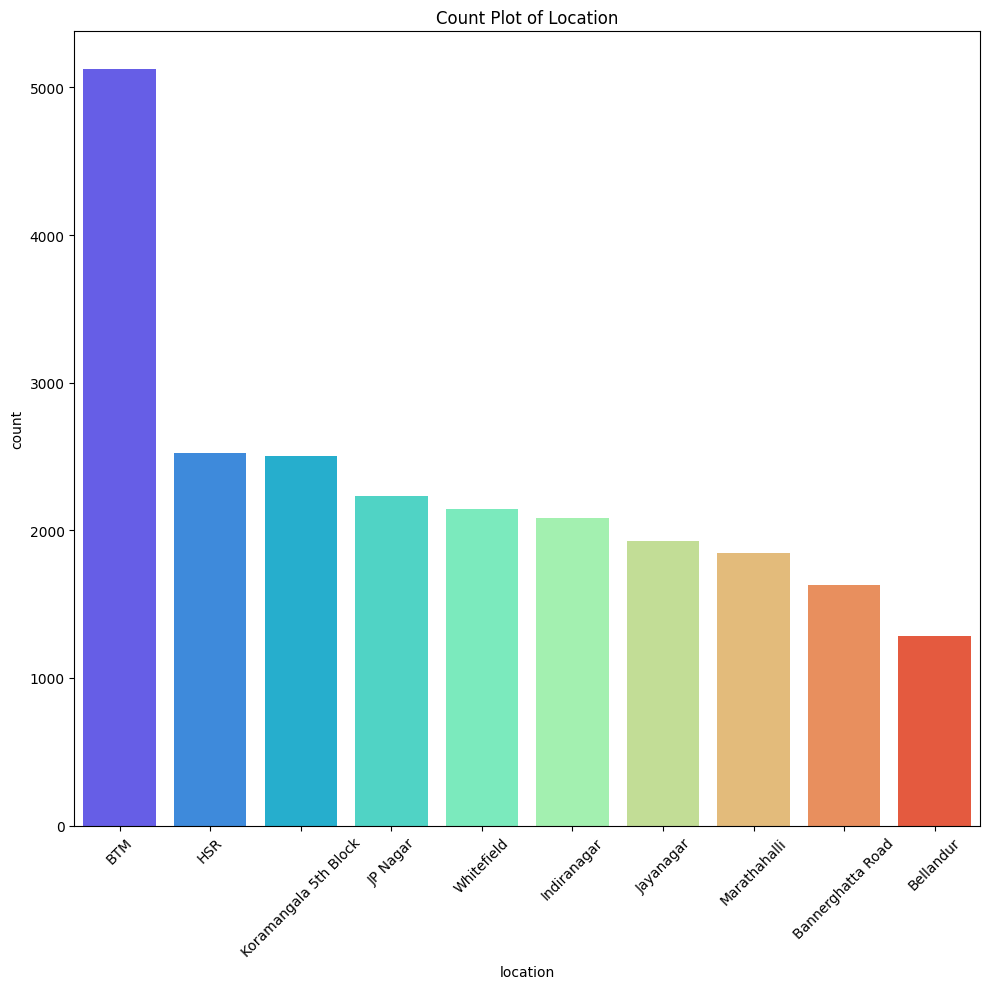

In [258]:
top10=df['location'].value_counts().nlargest(10).index
df_top=df[df['location'].isin(top10)]

plt.figure(figsize=(10,10))
sns.countplot(x='location',data=df_top,order=top10,palette='rainbow')
plt.title('Count Plot of Location')
plt.xticks(rotation=45)
plt.tight_layout()



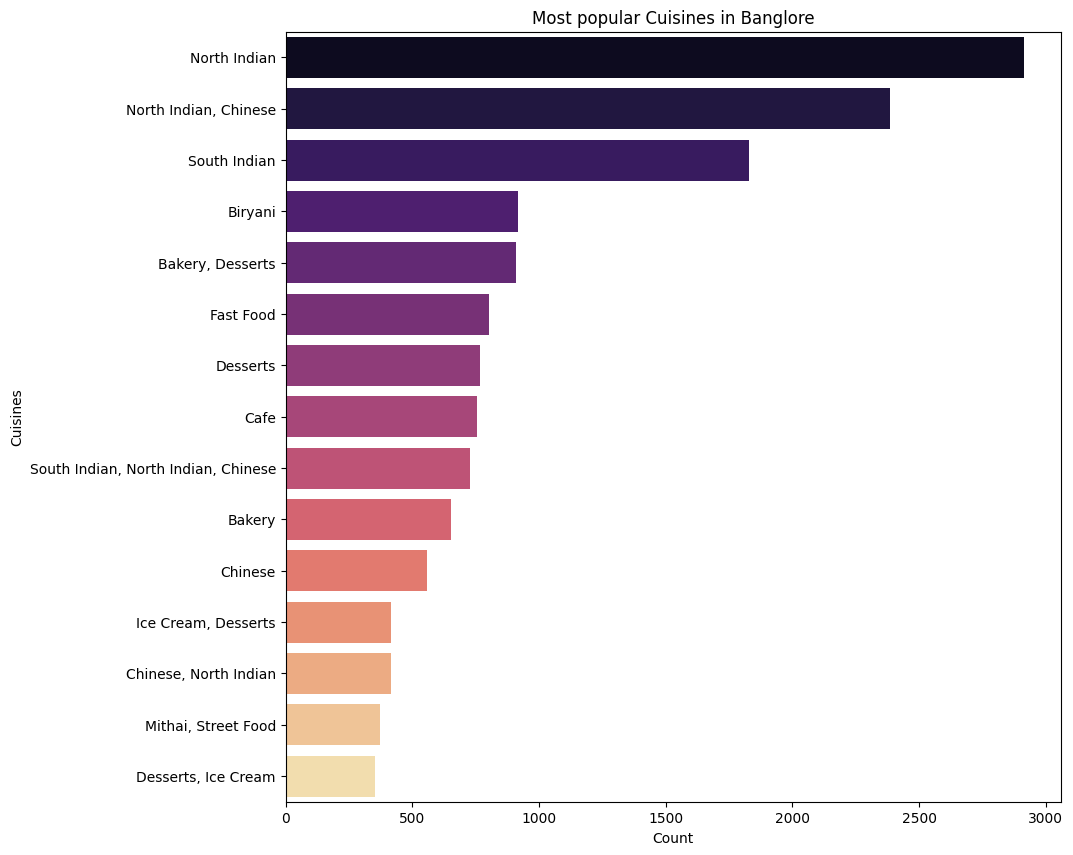

In [267]:
plt.figure(figsize=(10,10))
cus = df['cuisines'].value_counts()[:15]
sns.barplot(x=cus.values, y=cus.index, palette='magma')
plt.title('Most popular Cuisines in Banglore')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()


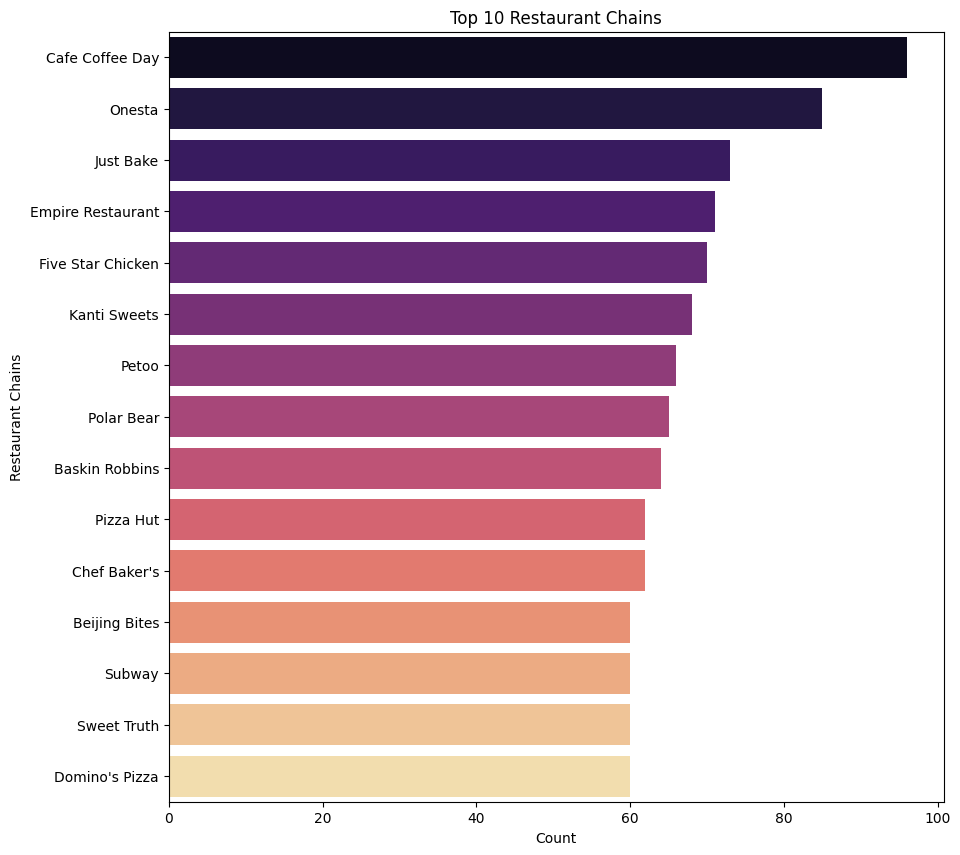

In [269]:
top_chains=df['name'].value_counts().nlargest(15)
figure=plt.figure(figsize=(10,10))
sns.barplot(x=top_chains.values, y= top_chains.index, palette='magma')

plt.title('Top 10 Restaurant Chains')
plt.xlabel('Count')
plt.ylabel('Restaurant Chains')
plt.show()